### Import Packages


In [1]:
import torch
import numpy as np
import time
from scipy.ndimage import distance_transform_edt as distance
from scipy.ndimage import _nd_image

In [2]:
device = torch.device("cuda:0")
print(device)

cuda:0


## Benchmarks

In [3]:
dt_mean = []
dt_std = []
	
dt_GPU_mean = []
dt_GPU_std = []

dt_times = []
dt_GPU_times = []

In [4]:
for n in range(1,1000,100):
  # Euclidean Distance CPU
  temp_dt_time = []
  for i in range(100): #Samples
    a = []
    for j in range(10): #Evaluations
      x1 = torch.randint(0,1,(n,n))
      times1 = time.time()
      tfm1 = torch.from_numpy(distance(x1))
      a.append(time.time()-times1)
    temp_dt_time.append(torch.mean(torch.FloatTensor(a)))
  dt_times.append(temp_dt_time)

for n in range(1,1000,100):
  # Euclidean Distance GPU
  temp_dt_GPU_time = []
  for i in range(100): #Samples
    b = []
    for j in range(10): #Evaluations
      x2 = torch.randint(0,1,(n,n)).to(device)
      times2 = time.time()
      tfm2 = torch.from_numpy(distance(x2.cpu().numpy())).to(device)  
      b.append(time.time()-times2)
    temp_dt_GPU_time.append(torch.mean(torch.FloatTensor(b)))
  dt_GPU_times.append(temp_dt_GPU_time)

In [5]:
for i in dt_times:
  dt_mean.append(torch.mean(torch.FloatTensor(i)).numpy().tolist())
  dt_std.append(torch.std(torch.FloatTensor(i), unbiased = False).numpy().tolist())

In [6]:
for i in dt_GPU_times:
  dt_GPU_mean.append(torch.mean(torch.FloatTensor(i)).numpy().tolist())
  dt_GPU_std.append(torch.std(torch.FloatTensor(i), unbiased = False).numpy().tolist())

## Save

In [7]:
import pandas as pd

In [8]:
dt_mean = np.array(dt_mean)
dt_GPU_mean = np.array(dt_GPU_mean)
dt_std = np.array(dt_std)
dt_GPU_std = np.array(dt_GPU_std)

In [9]:
data = {'dt_mean': dt_mean, 'dt_GPU_mean': dt_GPU_mean, 'dt_std': dt_std, 'dt_GPU_std':dt_GPU_std}

In [10]:
dataframe = pd.DataFrame(data)

In [11]:
dataframe.to_csv('python_dt.csv')

In [12]:
dataframe

,dt_mean,dt_GPU_mean,dt_std,dt_GPU_std
0,0.000057,0.000068,0.000045,0.000012
1,0.000934,0.000857,0.000273,0.000071
2,0.003015,0.003481,0.000181,0.000134
3,0.006780,0.007379,0.000331,0.000215
4,0.012336,0.012758,0.000335,0.000366
5,0.019122,0.021332,0.000715,0.000662
6,0.027148,0.031114,0.001104,0.000953
7,0.037865,0.040692,0.001716,0.001169
8,0.048713,0.053862,0.001957,0.002238
9,0.063852,0.068278,0.002142,0.002378


In [13]:
x = [i for i in range(1, 1000, 100)]

In [14]:
import matplotlib.pyplot as plt

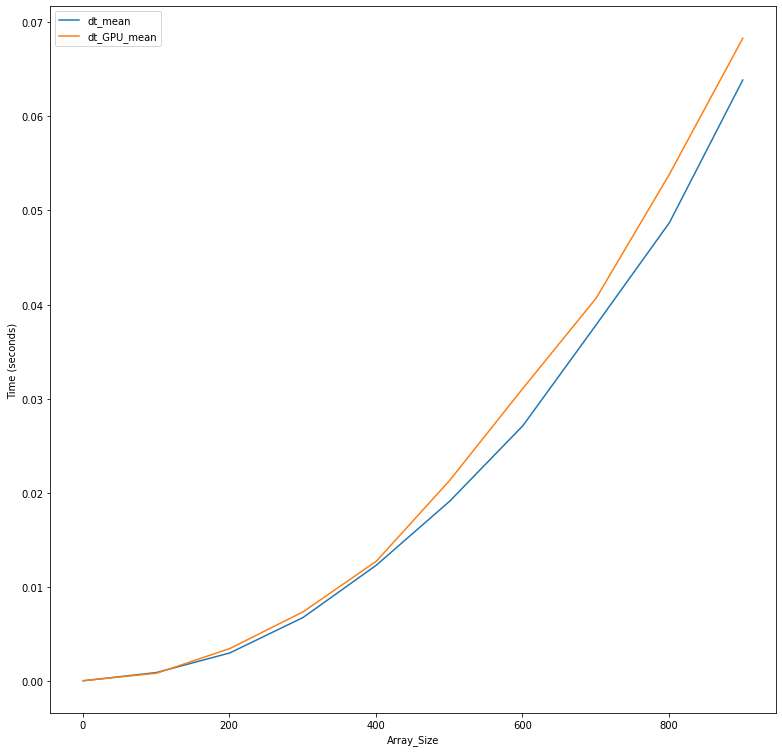

In [17]:
plt.figure(figsize=(13, 13))
plt.plot(x, dataframe['dt_mean'], label = 'dt_mean')
plt.plot(x, dataframe['dt_GPU_mean'], label = 'dt_GPU_mean')
plt.xlabel('Array_Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()